We suspect that our labeled dataset is biased. In this notebook, I made some first plots to see whether this is indeed the case.

#### Load libraries and data

In [3]:
import seaborn as sb
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\beatg\Documents\scriptie\Experiments\Thesis-Data-Visualisations


In [16]:
df = pd.read_csv("All_Data_Prepped.csv", sep=',', low_memory=False)

## Visualisation

Emiel gave an indication of which features probably cause the most bias. The features he mentioned were 'log Kow (KowWin v1.67)' (QSAR prediction of the 10log of the octanol/water partition coefficient) and 'BIOWIN3' (QSAR prediction of rate of environmental mineralization ). Emiel suspects that Moleculair Weight (MW) is not a cause of bias (i.e., the distribution of molecular weight only in the labeled dataset should be representative of the population/testing set).

### Scatterplot comparisons

The orange points are from the labeled dataset(~750 entries), the green points are from the unlabeled physchem dataset (~64000 entries).
The normalized versions of the density plots on the diagonal can be found further down in this notebook

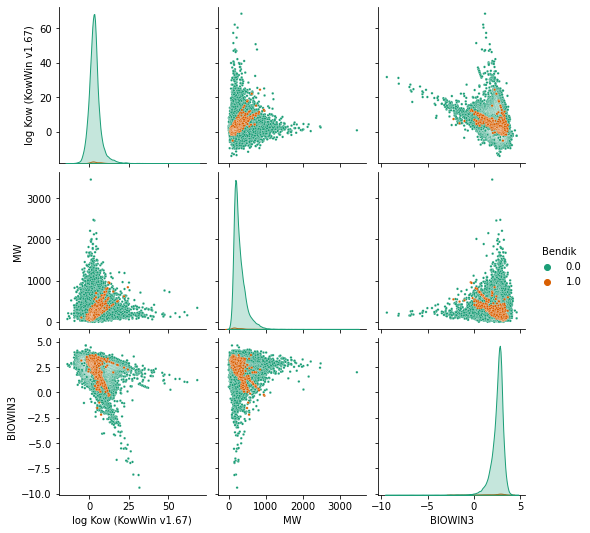

In [29]:
sb.pairplot(df, vars=['log Kow (KowWin v1.67)','MW','BIOWIN3',], hue='Bendik', palette='Dark2', plot_kws={"s": 6})

### Scatterplot comparison up close

#### log Kow vs Molecular Weight

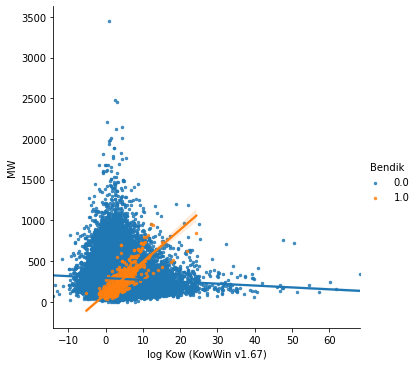

In [20]:
sb.lmplot(x='log Kow (KowWin v1.67)', y='MW', hue = 'Bendik',scatter_kws={"s": 6}, data=df)

#### log Kow vs BIOWIN 3

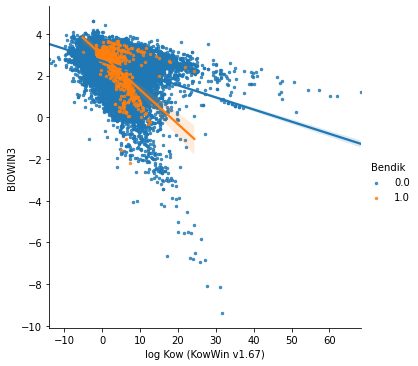

In [34]:
sb.lmplot(x='log Kow (KowWin v1.67)', y='BIOWIN3', hue = 'Bendik',scatter_kws={"s": 6}, data=df)

#### BIOWIN 3 vs Molecular Weight

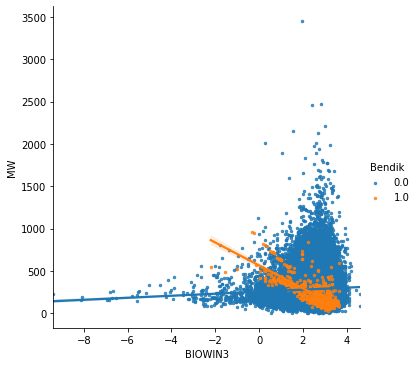

In [36]:
sb.lmplot(x='BIOWIN3', y='MW', hue = 'Bendik',scatter_kws={"s": 6}, data=df)

### Normalized density comparisons

#### Molecular weight

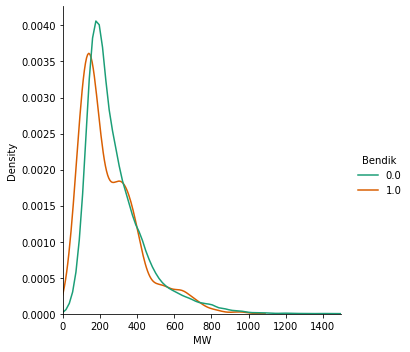

In [30]:
sb.displot(df, x="MW", kind = "kde", hue='Bendik', common_norm=False, palette='Dark2').set(xlim=(0, 1500))

#### log Kow

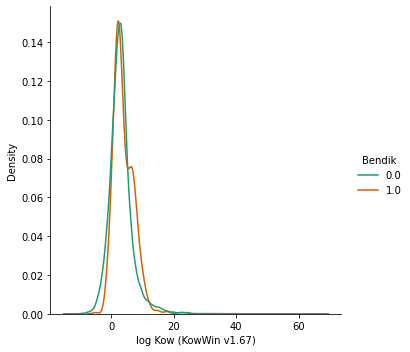

In [32]:
sb.displot(df, x="log Kow (KowWin v1.67)", kind = "kde", hue='Bendik', common_norm=False, palette='Dark2')

#### BIOWIN 3

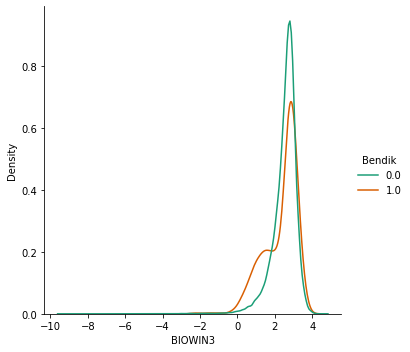

In [33]:
sb.displot(df, x="BIOWIN3", kind = "kde", hue='Bendik', common_norm=False, palette='Dark2')